# Wallmart Project

1.	Importing the Dataset and Data Analysis:
    •	Import the dataset.
    •	Check the structure and characteristics of the dataset.
    •	Detect null values and outliers using boxplots, descriptive statistics, and checking for null values.
2.	Data Exploration:
    •	Track the amount spent per transaction for male and female customers.
    •	Calculate the average spending for male and female customers.
    •	Infer insights based on the computed averages.
    •	Use the sample average to find confidence intervals for average spending of male and female customers.
    •	Utilize the Central Limit Theorem to compute the intervals and observe the distribution of mean expenses.
    •	Experiment with different confidence levels (90%, 95%, etc.) and report observations.
    •	Conclude by determining if confidence intervals overlap or not.
3.	Comparison based on Marital Status and Age:
    •	Repeat the above steps for married vs. unmarried customers and different age groups (e.g., 0-17, 18-25, etc.).
4.	Recommendations and Action Items:
    •	Based on the analysis, provide recommendations and action items for Walmart to leverage the insights gained. For example, optimizing marketing strategies, tailoring products to specific demographics, or improving customer experience.


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("walmart_data.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.shape

(550068, 10)

In [6]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [7]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [9]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [10]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [11]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [12]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [13]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [14]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [15]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [16]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [17]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

D:\program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

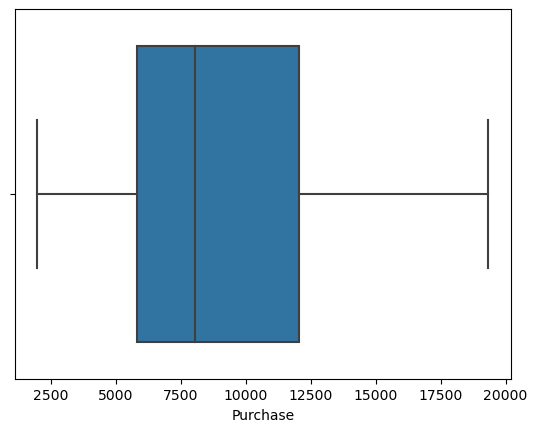

In [18]:
lower_purchase = df['Purchase'].quantile(.05)
upper_purchase = df['Purchase'].quantile(.95)
clipped_purchased = df['Purchase'].clip(lower_purchase,upper_purchase)
sns.boxplot(clipped_purchased)

In [19]:
clipped_purchased.describe()

count    550068.000000
mean       9256.710489
std        4855.947166
min        1984.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       19336.000000
Name: Purchase, dtype: float64

<AxesSubplot:xlabel='Purchase', ylabel='City_Category'>

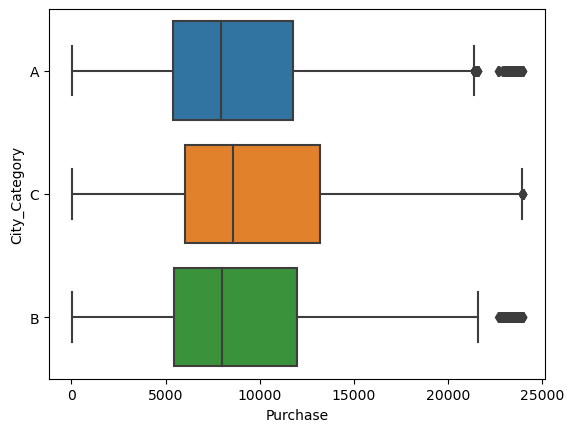

In [20]:
sns.boxplot(data=df,x='Purchase',y='City_Category')

In [21]:
df.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

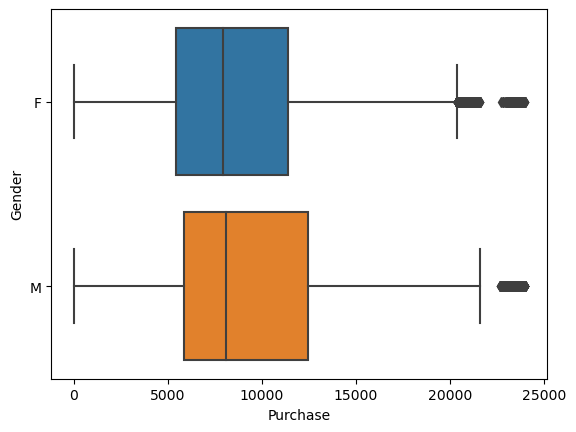

In [22]:
sns.boxplot(data=df,x='Purchase',y='Gender')

In [23]:
pd.crosstab(df['City_Category'],df['Stay_In_Current_City_Years'],margins=True)

Stay_In_Current_City_Years,0,1,2,3,4+,All
City_Category,,,,,,
A,24178,49305,27114,24804,22319,147720
B,28687,83413,41772,42691,34610,231173
C,21533,61103,32952,27790,27797,171175
All,74398,193821,101838,95285,84726,550068


In [24]:
df[df['Gender']=='F']['Product_ID'].value_counts()

P00265242    508
P00220442    440
P00058042    387
P00255842    375
P00110742    365
            ... 
P00245742      1
P00229142      1
P00310942      1
P00225242      1
P00271642      1
Name: Product_ID, Length: 3367, dtype: int64

In [25]:
df[df['Gender']=='M']['Product_ID'].value_counts()

P00265242    1372
P00025442    1267
P00110742    1247
P00112142    1223
P00057642    1212
             ... 
P00340742       1
P00306942       1
P00144142       1
P00065542       1
P00203742       1
Name: Product_ID, Length: 3588, dtype: int64

In [26]:
pd.crosstab(df['City_Category'],df['Product_Category'],margins=True)

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
City_Category,,,,,,,,,,,,,,,,,,,,,
A,35081,6141,4943,3050,42211,5507,1226,32179,110,1333,...,1063,1614,481,1717,2848,121,753,273,468,147720
B,58253,10444,8587,5226,64138,8526,1599,47553,174,2063,...,1675,2271,632,2638,4038,267,1389,462,753,231173
C,47044,7279,6683,3477,44584,6433,896,34193,126,1729,...,1209,1664,410,1935,2942,190,983,868,1329,171175
All,140378,23864,20213,11753,150933,20466,3721,113925,410,5125,...,3947,5549,1523,6290,9828,578,3125,1603,2550,550068


In [27]:
pd.crosstab(df['Age'],df['Product_Category'],margins=True)

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
Age,,,,,,,,,,,,,,,,,,,,,
0-17,3585,805,1200,758,4330,399,53,2258,16,111,...,125,112,39,160,229,6,27,59,90,15102
18-25,26962,4428,4710,2463,28522,3749,481,17911,63,603,...,439,756,230,1024,1598,41,339,275,469,99660
26-35,58249,8928,7662,4192,61473,8485,1651,44256,154,1787,...,1096,2096,564,2372,4118,127,1042,563,898,219587
36-45,27648,4912,3854,2354,29377,3899,809,23296,107,1235,...,994,1250,312,1395,1955,135,702,320,506,110013
46-50,10474,2105,1376,990,11971,1622,327,10656,33,520,...,520,551,149,602,879,95,351,149,227,45701
51-55,9049,1781,924,678,9893,1450,266,9340,29,519,...,433,483,154,508,672,107,423,134,200,38501
55+,4411,905,487,318,5367,862,134,6208,8,350,...,340,301,75,229,377,67,241,103,160,21504
All,140378,23864,20213,11753,150933,20466,3721,113925,410,5125,...,3947,5549,1523,6290,9828,578,3125,1603,2550,550068


In [28]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [29]:
df.groupby('Gender')['Purchase'].std()

Gender
F    4767.233289
M    5092.186210
Name: Purchase, dtype: float64

In [30]:
df_female = df[df['Gender']=='F']
df_male = df[df['Gender']=='M']

In [31]:
df_female['Purchase'].mean(),df_male['Purchase'].mean()


(8734.565765155476, 9437.526040472265)

Text(0.5, 1.0, 'Male Purchase Pattern')

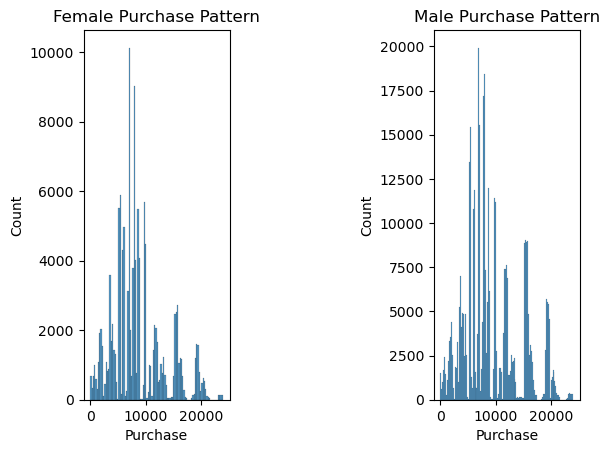

In [32]:
plt.subplot(1,3,1)
sns.histplot(df_female['Purchase']).set_title("Female Purchase Pattern")
plt.subplot(1,3,3)
sns.histplot(df_male['Purchase']).set_title("Male Purchase Pattern")

In [33]:
df_male

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [34]:
df_male_samp300 = [np.mean(df_male['Purchase'].sample(300)) for i in range(2000)]
df_female_samp300 = [np.mean(df_female['Purchase'].sample(300)) for i in range(2000)]
df_male_samp3000 = [np.mean(df_male['Purchase'].sample(3000)) for i in range(2000)]
df_female_samp3000 = [np.mean(df_female['Purchase'].sample(3000)) for i in range(2000)]
df_male_samp30000 = [np.mean(df_male['Purchase'].sample(30000)) for i in range(2000)]
df_female_samp30000 = [np.mean(df_female['Purchase'].sample(30000)) for i in range(2000)]

Text(0.5, 1.0, 'Female with 30000 samples')

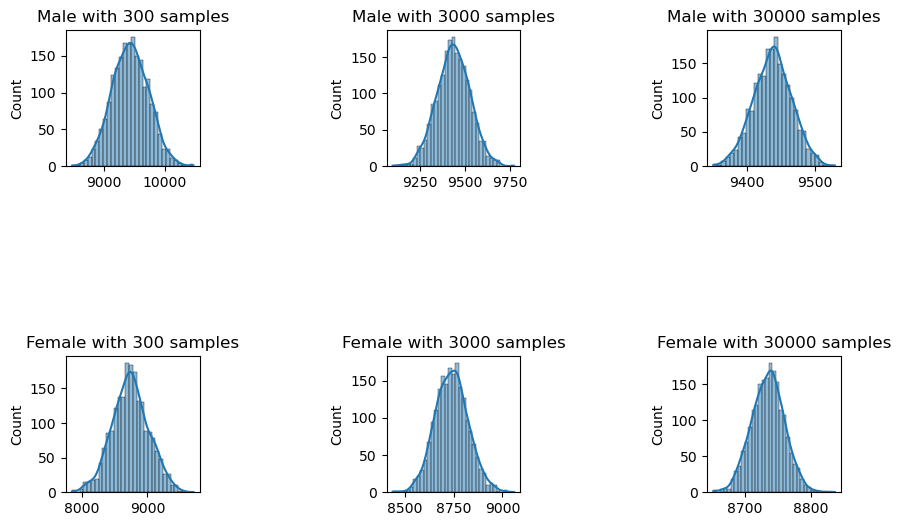

In [35]:
plt.figure(figsize=(10,6))
plt.subplot(3,5,1)
sns.histplot(df_male_samp300,kde=True).set_title("Male with 300 samples")
plt.subplot(3,5,11)
sns.histplot(df_female_samp300,kde=True).set_title("Female with 300 samples")
plt.subplot(3,5,3)
sns.histplot(df_male_samp3000,kde=True).set_title("Male with 3000 samples")
plt.subplot(3,5,13)
sns.histplot(df_female_samp3000,kde=True).set_title("Female with 3000 samples")
plt.subplot(3,5,5)
sns.histplot(df_male_samp30000,kde=True).set_title("Male with 30000 samples")
plt.subplot(3,5,15)
sns.histplot(df_female_samp30000,kde=True).set_title("Female with 30000 samples")

In [36]:
muM300 = np.array(df_male_samp300).mean()
sigmaM300 = np.array(df_male_samp300).std()
muF300 = np.array(df_female_samp300).mean()
sigmaF300 = np.array(df_female_samp300).std()
muM3000 = np.array(df_male_samp3000).mean()
sigmaM3000 = np.array(df_male_samp3000).std()
muF3000 = np.array(df_female_samp3000).mean()
sigmaF3000 = np.array(df_female_samp3000).std()
muM30000 = np.array(df_male_samp30000).mean()
sigmaM30000 = np.array(df_male_samp30000).std()
muF30000 = np.array(df_female_samp30000).mean()
sigmaF30000 = np.array(df_female_samp30000).std()




mf_mean_std = [["Male_300",muM300, sigmaM300],["Female_300",muF300, sigmaF300],["Male_3000",muM3000, sigmaM3000],["Female_3000",muF3000, sigmaF3000],["Male_30000",muM30000, sigmaM30000],["Female_30000",muF30000, sigmaF30000]]
mf_mean_std_data = pd.DataFrame(mf_mean_std,columns=["Sample","mean","std"])
mf_mean_std_data

,Sample,mean,std
0,Male_300,9436.794093,295.544391
1,Female_300,8741.228758,278.028417
2,Male_3000,9436.314980,91.666525
3,Female_3000,8738.995662,84.828825
4,Male_30000,9437.707739,28.103488
5,Female_30000,8734.575320,24.933517


Here we can see that as the number of sample increases mean decreases and standard deviation increases but it is not necessary. And also we have the mean of the whole dataset for female and male Purchase amount (8734.565765155476, 9437.526040472265) and we can see that as the as number of samples increase our sample is more near to Population mean.

In [37]:
from scipy.stats import norm

In [38]:
M300_confidence = norm.interval(confidence=.95,loc=muM300,scale=sigmaM300/np.sqrt(300))
F300_confidence = norm.interval(confidence=.95,loc=muF300,scale=sigmaF300/np.sqrt(300))
M3000_confidence = norm.interval(confidence=.95,loc=muM3000,scale=sigmaM3000/np.sqrt(3000))
F3000_confidence = norm.interval(confidence=.95,loc=muF3000,scale=sigmaF3000/np.sqrt(3000))
M30000_confidence = norm.interval(confidence=.95,loc=muM30000,scale=sigmaM30000/np.sqrt(30000))
F30000_confidence = norm.interval(confidence=.95,loc=muF30000,scale=sigmaF30000/np.sqrt(30000))
confidence_interval = pd.DataFrame({ "M300":M300_confidence,"F300":F300_confidence,"M3000":M3000_confidence,"F3000":F3000_confidence,"M30000":M30000_confidence,"F30000":F30000_confidence,}).T
confidence_interval.rename(columns={0:"From" , 1:"To"},inplace=True)
confidence_interval

,From,To
M300,9403.350712,9470.237475
F300,8709.767459,8772.690057
M3000,9433.034796,9439.595164
F3000,8735.960157,8742.031166
M30000,9437.389724,9438.025754
F30000,8734.293176,8734.857464


In [39]:
confidence_interval["diff"] = confidence_interval["To"]-confidence_interval["From"]
confidence_interval

,From,To,diff
M300,9403.350712,9470.237475,66.886763
F300,8709.767459,8772.690057,62.922598
M3000,9433.034796,9439.595164,6.560368
F3000,8735.960157,8742.031166,6.071010
M30000,9437.389724,9438.025754,0.636030
F30000,8734.293176,8734.857464,0.564288


<AxesSubplot:ylabel='Count'>

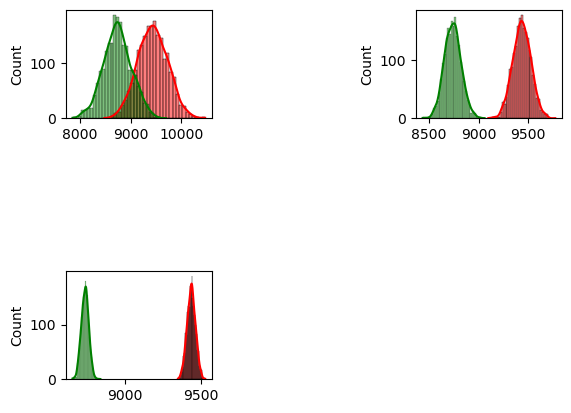

In [40]:
plt.subplot(3,3,1)
sns.histplot(df_male_samp300,kde=True,color='red')
sns.histplot(df_female_samp300,kde=True,color='green')
plt.subplot(3,3,3)
sns.histplot(df_male_samp3000,kde=True,color='red')
sns.histplot(df_female_samp3000,kde=True,color='green')
plt.subplot(3,3,7)
sns.histplot(df_male_samp30000,kde=True,color='red')
sns.histplot(df_female_samp30000,kde=True,color='green')

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [42]:
df_unmarried = df[df['Marital_Status'] == 0]
df_married = df[df['Marital_Status'] == 1]

In [43]:
df_unmarried["Purchase"].mean(),df_married["Purchase"].mean()

(9265.907618921507, 9261.174574082374)

In [44]:
df_unmarried_samp300 = [np.mean(df_unmarried['Purchase'].sample(300)) for i in range(2000)]
df_married_samp300 = [np.mean(df_married['Purchase'].sample(300)) for i in range(2000)]
df_unmarried_samp3000 = [np.mean(df_unmarried['Purchase'].sample(3000)) for i in range(2000)]
df_married_samp3000 = [np.mean(df_married['Purchase'].sample(3000)) for i in range(2000)]
df_unmarried_samp30000 = [np.mean(df_unmarried['Purchase'].sample(30000)) for i in range(2000)]
df_married_samp30000 = [np.mean(df_married['Purchase'].sample(30000)) for i in range(2000)]


Text(0.5, 1.0, 'Married sample of 30000')

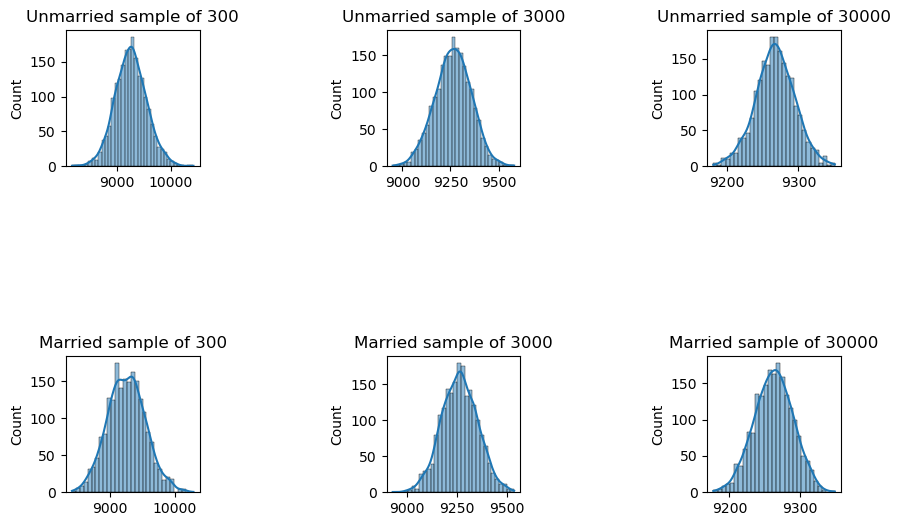

In [45]:
plt.figure(figsize=(10,6))
plt.subplot(3,5,1)
sns.histplot(df_unmarried_samp300,kde=True).set_title("Unmarried sample of 300")
plt.subplot(3,5,11)
sns.histplot(df_married_samp300,kde=True).set_title("Married sample of 300")
plt.subplot(3,5,3)
sns.histplot(df_unmarried_samp3000,kde=True).set_title("Unmarried sample of 3000")
plt.subplot(3,5,13)
sns.histplot(df_married_samp3000,kde=True).set_title("Married sample of 3000")
plt.subplot(3,5,5)
sns.histplot(df_unmarried_samp30000,kde=True).set_title("Unmarried sample of 30000")
plt.subplot(3,5,15)
sns.histplot(df_married_samp30000,kde=True).set_title("Married sample of 30000")


In [46]:
mu300u = np.array(df_unmarried_samp300).mean()
sigma300u = np.array(df_unmarried_samp300).std()
mu300m = np.array(df_married_samp300).mean()
sigma300m = np.array(df_married_samp300).std()
mu3000u = np.array(df_unmarried_samp3000).mean()
sigma3000u = np.array(df_unmarried_samp3000).std()
mu3000m = np.array(df_married_samp3000).mean()
sigma3000m = np.array(df_married_samp3000).std()
mu30000u = np.array(df_unmarried_samp30000).mean()
sigma30000u = np.array(df_unmarried_samp30000).std()
mu30000m = np.array(df_married_samp30000).mean()
sigma30000m = np.array(df_married_samp30000).std()


MunM_mean_std = [[ "Unmarried300",mu300u, sigma300u],["Married300",mu300m, sigma300m],["Unmarried3000",mu3000u, sigma3000u],["Married3000",mu3000m, sigma3000m],["Unmarried30000",mu30000u, sigma30000u],["Married30000",mu30000m, sigma30000m]]
MunM_mean_std_data = pd.DataFrame(MunM_mean_std, columns=["Sample","mean","std"])
MunM_mean_std_data

,Sample,mean,std
0,Unmarried300,9256.979897,291.345191
1,Married300,9256.053835,290.995162
2,Unmarried3000,9263.638175,93.469701
3,Married3000,9262.873043,90.720472
4,Unmarried30000,9267.280859,27.506866
5,Married30000,9262.512670,27.377793


In [50]:
from scipy.stats import norm
z_low = norm.ppf(0.025)
z_high = norm.ppf(.975)

In [51]:
UnM300_interval = [(mu300u + (z_low*sigma300u/np.sqrt(300))),(mu300u + (z_high*sigma300u/np.sqrt(300)))]
M300_interval = [(mu300m + (z_low*sigma300m/np.sqrt(300))),(mu300m + (z_high*sigma300m/np.sqrt(300)))]
UnM3000_interval = [(mu3000u + (z_low*sigma3000u/np.sqrt(3000))),(mu3000u + (z_high*sigma3000u/np.sqrt(3000)))]
M3000_interval = [(mu3000m + (z_low*sigma3000m/np.sqrt(3000))),(mu3000m + (z_high*sigma3000m/np.sqrt(3000)))]
UnM30000_interval = [(mu30000u + (z_low*sigma30000u/np.sqrt(30000))),(mu30000u + (z_high*sigma30000u/np.sqrt(30000)))]
M30000_interval = [(mu30000m + (z_low*sigma30000m/np.sqrt(30000))),(mu30000m + (z_high*sigma30000m/np.sqrt(30000)))]
MunM_CI = pd.DataFrame({ "UnM300":UnM300_interval,"M300":M300_interval,"UnM3000":UnM3000_interval,"M3000":M3000_interval,"UnM30000":UnM30000_interval,"M30000":M30000_interval}).T
MunM_CI.rename(columns={0:"From" , 1:"To"},inplace=True)
MunM_CI['diff']= MunM_CI["To"] - MunM_CI["From"]
MunM_CI

,From,To,diff
UnM300,9224.011691,9289.948103,65.936412
M300,9223.125238,9288.982432,65.857195
UnM3000,9260.293466,9266.982884,6.689418
M3000,9259.626712,9266.119374,6.492661
UnM30000,9266.969595,9267.592123,0.622528
M30000,9262.202867,9262.822473,0.619606


<AxesSubplot:ylabel='Count'>

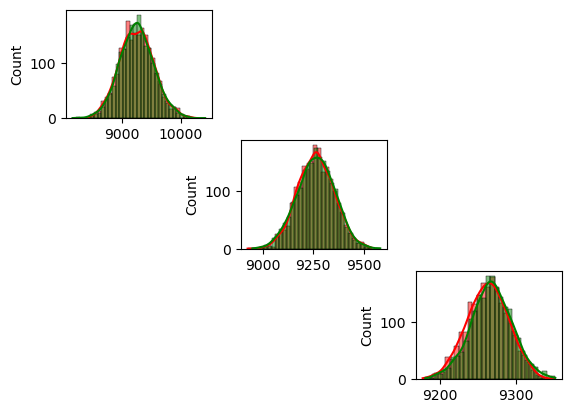

In [52]:
plt.subplot(3,3,1)
sns.histplot(df_married_samp300,kde=True,color='red')
sns.histplot(df_unmarried_samp300,kde=True,color='green')
plt.subplot(3,3,5)
sns.histplot(df_married_samp3000,kde=True,color='red')
sns.histplot(df_unmarried_samp3000,kde=True,color='green')
plt.subplot(3,3,9)
sns.histplot(df_married_samp30000,kde=True,color='red')
sns.histplot(df_unmarried_samp30000,kde=True,color='green')

In [53]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [54]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [55]:
df.groupby('Age')["Purchase"].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [56]:
df_0_17 = df[df['Age']=='0-17']
df_18_25 = df[df['Age']=='18-25']
df_26_35 = df[df['Age']=='26-35']
df_36_45 = df[df['Age']=='36-45']
df_46_50 = df[df['Age']=='46-50']
df_51_55 = df[df['Age']=='51-55']
df_55 = df[df['Age']=='55+']

In [57]:
df_0_17_samp300 = [np.mean(df_0_17['Purchase'].sample(300)) for i in range(2000)]
df_18_25_samp300 = [np.mean(df_18_25['Purchase'].sample(300)) for i in range(2000)]
df_26_35_samp300 = [np.mean(df_26_35['Purchase'].sample(300)) for i in range(2000)]
df_36_45_samp300 = [np.mean(df_36_45['Purchase'].sample(300)) for i in range(2000)]
df_46_50_samp300 = [np.mean(df_46_50['Purchase'].sample(300)) for i in range(2000)]
df_51_55_samp300 = [np.mean(df_51_55['Purchase'].sample(300)) for i in range(2000)]
df_55_samp300 = [np.mean(df_55['Purchase'].sample(300)) for i in range(2000)]

Text(0.5, 1.0, 'Age 55+')

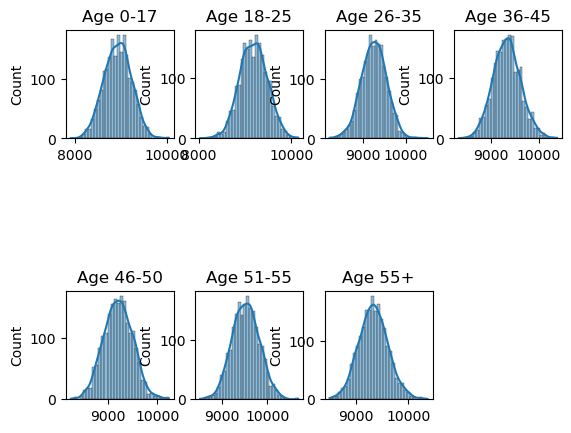

In [58]:
plt.subplot(3,4,1)
sns.histplot(df_0_17_samp300,kde=True).set_title('Age 0-17')
plt.subplot(3,4,2)
sns.histplot(df_18_25_samp300,kde=True).set_title('Age 18-25')
plt.subplot(3,4,3)
sns.histplot(df_26_35_samp300,kde=True).set_title('Age 26-35')
plt.subplot(3,4,4)
sns.histplot(df_36_45_samp300,kde=True).set_title('Age 36-45')
plt.subplot(3,4,9)
sns.histplot(df_46_50_samp300,kde=True).set_title('Age 46-50')
plt.subplot(3,4,10)
sns.histplot(df_51_55_samp300,kde=True).set_title('Age 51-55')
plt.subplot(3,4,11)
sns.histplot(df_55_samp300,kde=True).set_title('Age 55+')



In [59]:
mu300_0_17   = np.mean(df_0_17_samp300)
mu300_18_25  = np.mean(df_18_25_samp300)
mu300_26_35  = np.mean(df_26_35_samp300)
mu300_36_45  = np.mean(df_36_45_samp300)
mu300_46_50  = np.mean(df_46_50_samp300)
mu300_51_55  = np.mean(df_51_55_samp300)
mu300_55     = np.mean(df_55_samp300)
sigma300_0_17  =  np.std(df_0_17_samp300)
sigma300_18_25 = np.std(df_18_25_samp300)
sigma300_26_35 = np.std(df_26_35_samp300)
sigma300_36_45 = np.std(df_36_45_samp300)
sigma300_46_50 = np.std(df_46_50_samp300)
sigma300_51_55 = np.std(df_51_55_samp300)
sigma300_55    = np.std(df_55_samp300)
age_mean_std300 =np.transpose([["0_17","18_25","26_35","36_45","46_50","51_55","55+"],[ mu300_0_17, mu300_18_25, mu300_26_35, mu300_36_45, mu300_46_50, mu300_51_55,mu300_55],[sigma300_0_17, sigma300_18_25, sigma300_26_35, sigma300_36_45, sigma300_46_50, sigma300_51_55, sigma300_55]])
ams_data300= pd.DataFrame(age_mean_std300,columns=["Age Group","Mean","STD"])
ams_data300

,Age Group,Mean,STD
0,0_17,8928.352941666666,294.7753643577822
1,18_25,9180.242365,297.31369163625646
2,26_35,9252.053149999998,295.82215194518056
3,36_45,9329.071096666668,290.42184525584236
4,46_50,9212.715778333335,290.7260550664582
5,51_55,9531.88965,296.71373531001547
6,55+,9330.360349999999,281.0029980437531


In [60]:
[[ "0-17",(mu300_0_17 +   (z_low*sigma300_0_17/np.sqrt(300))),(mu300_0_17 +   (z_high*sigma300_0_17/np.sqrt(300)))],
[ "18-25",(mu300_18_25 + (z_low*sigma300_18_25/np.sqrt(300))),(mu300_18_25 + (z_high*sigma300_18_25/np.sqrt(300)))],
[ "26-35",(mu300_26_35 + (z_low*sigma300_26_35/np.sqrt(300))),(mu300_26_35 + (z_high*sigma300_26_35/np.sqrt(300)))],
[ "36-45",(mu300_36_45 + (z_low*sigma300_36_45/np.sqrt(300))),(mu300_36_45 + (z_high*sigma300_36_45/np.sqrt(300)))],
[ "46-50",(mu300_46_50 + (z_low*sigma300_46_50/np.sqrt(300))),(mu300_46_50 + (z_high*sigma300_46_50/np.sqrt(300)))],
[ "51-55",(mu300_51_55 + (z_low*sigma300_51_55/np.sqrt(300))),(mu300_51_55 + (z_high*sigma300_51_55/np.sqrt(300)))],
[ "55+",  (mu300_55 + (z_low*sigma300_55/np.sqrt(300))),(mu300_55 + (z_high*sigma300_55/np.sqrt(300)))]]

[['0-17', 8894.99658196023, 8961.709301373103],
 ['18-25', 9146.598771799889, 9213.885958200111],
 ['26-35', 9218.57833730351, 9285.527962696486],
 ['36-45', 9296.207374971109, 9361.934818362228],
 ['46-50', 9179.81763268959, 9245.61392397708],
 ['51-55', 9498.313947001872, 9565.465352998126],
 ['55+', 9298.562451618105, 9362.158248381893]]

In [61]:
df_0_17_samp3000 = [np.mean(df_0_17['Purchase'].sample(3000))   for i in range(2000)]
df_18_25_samp3000 = [np.mean(df_18_25['Purchase'].sample(3000)) for i in range(2000)]
df_26_35_samp3000 = [np.mean(df_26_35['Purchase'].sample(3000)) for i in range(2000)]
df_36_45_samp3000 = [np.mean(df_36_45['Purchase'].sample(3000)) for i in range(2000)]
df_46_50_samp3000 = [np.mean(df_46_50['Purchase'].sample(3000)) for i in range(2000)]
df_51_55_samp3000 = [np.mean(df_51_55['Purchase'].sample(3000)) for i in range(2000)]
df_55_samp3000 = [np.mean(df_55['Purchase'].sample(3000)) for i in range(2000)]

Text(0.5, 1.0, 'Age 55+')

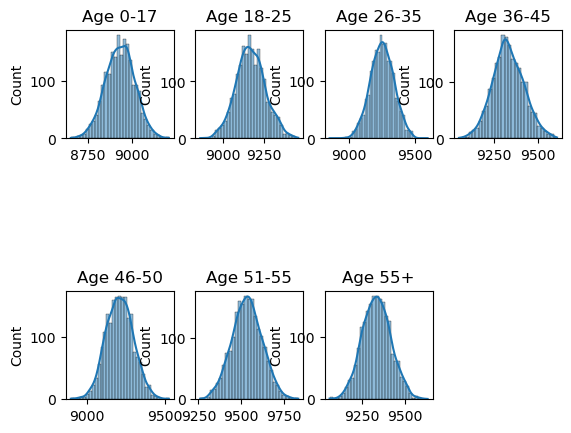

In [62]:
plt.subplot(3,4,1)
sns.histplot(df_0_17_samp3000,kde=True).set_title('Age 0-17')
plt.subplot(3,4,2)
sns.histplot(df_18_25_samp3000,kde=True).set_title('Age 18-25')
plt.subplot(3,4,3)
sns.histplot(df_26_35_samp3000,kde=True).set_title('Age 26-35')
plt.subplot(3,4,4)
sns.histplot(df_36_45_samp3000,kde=True).set_title('Age 36-45')
plt.subplot(3,4,9)
sns.histplot(df_46_50_samp3000,kde=True).set_title('Age 46-50')
plt.subplot(3,4,10)
sns.histplot(df_51_55_samp3000,kde=True).set_title('Age 51-55')
plt.subplot(3,4,11)
sns.histplot(df_55_samp3000,kde=True).set_title('Age 55+')

In [63]:
mu3000_0_17   = np.mean(df_0_17_samp3000)
mu3000_18_25  = np.mean(df_18_25_samp3000)
mu3000_26_35  = np.mean(df_26_35_samp3000)
mu3000_36_45  = np.mean(df_36_45_samp3000)
mu3000_46_50  = np.mean(df_46_50_samp3000)
mu3000_51_55  = np.mean(df_51_55_samp3000)
mu3000_55     = np.mean(df_55_samp3000)
sigma3000_0_17  =  np.std(df_0_17_samp3000)
sigma3000_18_25 = np.std(df_18_25_samp3000)
sigma3000_26_35 = np.std(df_26_35_samp3000)
sigma3000_36_45 = np.std(df_36_45_samp3000)
sigma3000_46_50 = np.std(df_46_50_samp3000)
sigma3000_51_55 = np.std(df_51_55_samp3000)
sigma3000_55    = np.std(df_55_samp3000)
age_mean_std3000 =np.transpose([["0_17","18_25","26_35","36_45","46_50","51_55","55+"],[ mu3000_0_17, mu3000_18_25, mu3000_26_35, mu3000_36_45, mu3000_46_50, mu3000_51_55,mu3000_55],[sigma3000_0_17, sigma3000_18_25, sigma3000_26_35, sigma3000_36_45, sigma3000_46_50, sigma3000_51_55, sigma3000_55]])
ams_data3000= pd.DataFrame(age_mean_std3000,columns=["Age Group","Mean","STD"])
ams_data3000

,Age Group,Mean,STD
0,0_17,8933.771170333333,82.46063612048808
1,18_25,9170.294897833332,89.66696671201878
2,26_35,9253.055793499998,89.38716654894887
3,36_45,9332.180388166667,89.3788899568159
4,46_50,9208.460950666666,88.051701622013
5,51_55,9535.312403000002,87.73657302536655
6,55+,9337.360695833333,83.14721321928077


In [64]:
[[ "0-17",(mu3000_0_17 +   (z_low*sigma3000_0_17/np.sqrt(3000))),(mu3000_0_17 +   (z_high*sigma3000_0_17/np.sqrt(3000)))],
[ "18-25",(mu3000_18_25 + (z_low*sigma3000_18_25/np.sqrt(3000))),(mu3000_18_25 + (z_high*sigma3000_18_25/np.sqrt(3000)))],
[ "26-35",(mu3000_26_35 + (z_low*sigma3000_26_35/np.sqrt(3000))),(mu3000_26_35 + (z_high*sigma3000_26_35/np.sqrt(3000)))],
[ "36-45",(mu3000_36_45 + (z_low*sigma3000_36_45/np.sqrt(3000))),(mu3000_36_45 + (z_high*sigma3000_36_45/np.sqrt(3000)))],
[ "46-50",(mu3000_46_50 + (z_low*sigma3000_46_50/np.sqrt(3000))),(mu3000_46_50 + (z_high*sigma3000_46_50/np.sqrt(3000)))],
[ "51-55",(mu3000_51_55 + (z_low*sigma3000_51_55/np.sqrt(3000))),(mu3000_51_55 + (z_high*sigma3000_51_55/np.sqrt(3000)))],
[ "55+",  (mu3000_55 + (z_low*sigma3000_55/np.sqrt(3000))),(mu3000_55 + (z_high*sigma3000_55/np.sqrt(3000)))]]

[['0-17', 8930.820408588654, 8936.721932078013],
 ['18-25', 9167.086265598811, 9173.503530067852],
 ['26-35', 9249.85717360174, 9256.254413398256],
 ['36-45', 9328.982064437014, 9335.378711896321],
 ['46-50', 9205.310118888938, 9211.611782444394],
 ['51-55', 9532.172847747066, 9538.451958252937],
 ['55+', 9334.385365694166, 9340.3360259725]]

In [69]:
df_0_17_samp15000 =   [np.mean(df_0_17['Purchase'].sample(15000)) for i in range(2000)]
df_18_25_samp15000 = [np.mean(df_18_25['Purchase'].sample(15000)) for i in range(2000)]
df_26_35_samp15000 = [np.mean(df_26_35['Purchase'].sample(15000)) for i in range(2000)]
df_36_45_samp15000 = [np.mean(df_36_45['Purchase'].sample(15000)) for i in range(2000)]
df_46_50_samp15000 = [np.mean(df_46_50['Purchase'].sample(15000)) for i in range(2000)]
df_51_55_samp15000 = [np.mean(df_51_55['Purchase'].sample(15000)) for i in range(2000)]
df_55_samp15000 = [np.mean(df_55['Purchase'].sample(15000)) for i in range(2000)]

Text(0.5, 1.0, 'Age 55+')

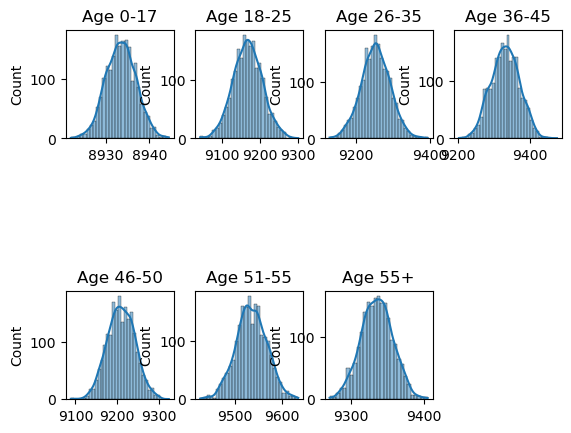

In [70]:
plt.subplot(3,4,1)
sns.histplot(df_0_17_samp15000,kde=True).set_title('Age 0-17')
plt.subplot(3,4,2)
sns.histplot(df_18_25_samp15000,kde=True).set_title('Age 18-25')
plt.subplot(3,4,3)
sns.histplot(df_26_35_samp15000,kde=True).set_title('Age 26-35')
plt.subplot(3,4,4)
sns.histplot(df_36_45_samp15000,kde=True).set_title('Age 36-45')
plt.subplot(3,4,9)
sns.histplot(df_46_50_samp15000,kde=True).set_title('Age 46-50')
plt.subplot(3,4,10)
sns.histplot(df_51_55_samp15000,kde=True).set_title('Age 51-55')
plt.subplot(3,4,11)
sns.histplot(df_55_samp15000,kde=True).set_title('Age 55+')

In [71]:
mu15000_0_17   =  np.mean(df_0_17_samp15000)
mu15000_18_25  = np.mean(df_18_25_samp15000)
mu15000_26_35  = np.mean(df_26_35_samp15000)
mu15000_36_45  = np.mean(df_36_45_samp15000)
mu15000_46_50  = np.mean(df_46_50_samp15000)
mu15000_51_55  = np.mean(df_51_55_samp15000)
mu15000_55     = np.mean(df_55_samp15000)
sigma15000_0_17  =  np.std(df_0_17_samp15000)
sigma15000_18_25 = np.std(df_18_25_samp15000)
sigma15000_26_35 = np.std(df_26_35_samp15000)
sigma15000_36_45 = np.std(df_36_45_samp15000)
sigma15000_46_50 = np.std(df_46_50_samp15000)
sigma15000_51_55 = np.std(df_51_55_samp15000)
sigma15000_55    = np.std(df_55_samp15000)
age_mean_std15000 =np.transpose([["0_17","18_25","26_35","36_45","46_50","51_55","55+"],[ mu15000_0_17, mu15000_18_25, mu15000_26_35, mu15000_36_45, mu15000_46_50, mu15000_51_55,mu15000_55],[sigma15000_0_17, sigma15000_18_25, sigma15000_26_35, sigma15000_36_45, sigma15000_46_50, sigma15000_51_55, sigma15000_55]])
ams_data15000= pd.DataFrame(age_mean_std15000,columns=["Age Group","Mean","STD"])
ams_data15000

,Age Group,Mean,STD
0,0_17,8933.532128966666,3.4073333535773997
1,18_25,9168.6844371,37.898039367569716
2,26_35,9253.059876133333,39.23210889085445
3,36_45,9332.009251333333,39.223745774453285
4,46_50,9209.584042566667,33.009937407614956
5,51_55,9535.3410859,32.30644709282752
6,55+,9335.861799566668,21.876972666720242


In [72]:
[[ "0-17",(mu15000_0_17 +   (z_low*sigma15000_0_17/np.sqrt(15000))),(mu15000_0_17 +   (z_high*sigma15000_0_17/np.sqrt(15000)))],
[ "18-25",(mu15000_18_25 + (z_low*sigma15000_18_25/np.sqrt(15000))),(mu15000_18_25 + (z_high*sigma15000_18_25/np.sqrt(15000)))],
[ "26-35",(mu15000_26_35 + (z_low*sigma15000_26_35/np.sqrt(15000))),(mu15000_26_35 + (z_high*sigma15000_26_35/np.sqrt(15000)))],
[ "36-45",(mu15000_36_45 + (z_low*sigma15000_36_45/np.sqrt(15000))),(mu15000_36_45 + (z_high*sigma15000_36_45/np.sqrt(15000)))],
[ "46-50",(mu15000_46_50 + (z_low*sigma15000_46_50/np.sqrt(15000))),(mu15000_46_50 + (z_high*sigma15000_46_50/np.sqrt(15000)))],
[ "51-55",(mu15000_51_55 + (z_low*sigma15000_51_55/np.sqrt(15000))),(mu15000_51_55 + (z_high*sigma15000_51_55/np.sqrt(15000)))],
[ "55+",  (mu15000_55 +       (z_low*sigma15000_55/np.sqrt(15000))),(mu15000_55 +       (z_high*sigma15000_55/np.sqrt(15000)))]]

[['0-17', 8933.477601278391, 8933.586656654941],
 ['18-25', 9168.077953300965, 9169.290920899037],
 ['26-35', 9252.432043167793, 9253.687709098873],
 ['36-45', 9331.381552203069, 9332.636950463597],
 ['46-50', 9209.055783253547, 9210.112301879786],
 ['51-55', 9534.824084569767, 9535.858087230232],
 ['55+', 9335.511701521606, 9336.21189761173]]

# Recommendation

# Male and female:
When the confidence interval for how much women spend is lower than men, it suggests women might be spending less. Here are some things Walmart could do:

1. Special Offers for Women: Give women special deals or discounts to encourage them to spend more.
2. Better Products for Women: Make sure the products Walmart sells are what women want to buy.
3. Make Shopping Easier for Women: Improve the shopping experience for women, both online and in stores.
4. Teach Women about Budgeting: Offer tips and advice to help women make smart spending choices.
5. Listen to Women: Ask women what they want and how Walmart can make shopping better for them.

# Married and Unmarried
When the confidence interval for spending is similar between married and unmarried people, it suggests that marital status might not significantly affect spending habits. Here are some actions Walmart could consider:

1. Universal Marketing: Instead of targeting specific marital statuses, focus on universal marketing strategies that appeal to all customers.
2. Diverse Product Range: Offer a diverse range of products that cater to the varied preferences of both married and unmarried individuals.
3. Customer Service Excellence: Prioritize excellent customer service to ensure all shoppers feel valued and satisfied, regardless of marital status.
4. Community Engagement: Engage with local communities to build strong relationships and foster loyalty among all customer demographics.
5. Research Further: Conduct additional research to understand if there are specific product categories or factors that influence spending behavior differently among married and unmarried individuals.
By recognizing that marital status might not be a significant factor in spending habits, Walmart can focus on providing an inclusive and welcoming shopping experience for all customers.

#  Based on Age
When the confidence intervals for spending across different age groups are very close together, it suggests that people in these age groups tend to spend similar amounts at Walmart. Here are some brief actions to consider:

1. Targeted Marketing by Preferences: Focus on marketing campaigns that appeal to the specific preferences and interests of each age group.
2. Tailored Product Recommendations: Offer personalized product recommendations based on the typical preferences of each age group.
3. In-Store Experience Enhancement: Improve the in-store experience to cater to the needs and preferences of customers across all age groups.
4. Digital Engagement: Develop digital engagement strategies that resonate with the tech-savvy younger age groups while ensuring accessibility for older demographics.
5. Feedback and Adaptation: Continuously gather feedback from customers across all age groups and adapt offerings and services accordingly.
By recognizing the similarities in spending habits across different age groups, Walmart can focus on providing a consistent and appealing shopping experience for all customers, regardless of age.